In [2]:
from tensorflow import keras
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# Preprocessing Data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (60000,784))
x_test = np.reshape(x_test, (10000,784))
x_train = x_train/225
x_test = x_test/225

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test,10)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#No activation NN

model1 = keras.Sequential()
model1.add(keras.layers.Dense(256, input_shape=(784,)))
model1.add(keras.layers.Dense(10, activation='softmax'))
model1.summary()
model1.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')
history1 = model1.fit(x_train, y_train, batch_size=128,epochs=12, verbose=1, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
375/375 [==============================] - 4s 8ms/step - loss: 0.4052 - accuracy: 0.8827 - val_loss: 0.3341 - val_accuracy: 0.8964
Epoch 2/12
375/375 [==============================] - 3s 8ms/step - loss: 0.3113 - accuracy: 0.9116 - val_loss: 0.2866 - val_accuracy: 0.9218
Epoch 3/12
375/375 [==============================] - 3s 8ms/step - loss: 0.2965 - accuracy: 0.9174 - val_loss: 0.3088 - val_accuracy: 0.9137
Epoch 4/12
375/375 [

[0.2857195734977722, 0.9190999865531921]


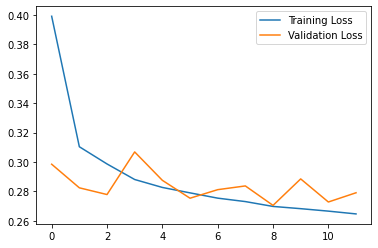

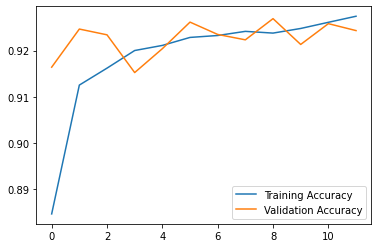

In [ ]:
# Plotting no activation NN
keys = history1.history.keys()
loss = history1.history['loss']
accuracy = history1.history['accuracy']
val_loss = history1.history['val_loss']
val_accuracy =  history1.history['val_accuracy']

plt.figure()
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend(loc="upper right")

plt.figure()
plt.plot(accuracy, label="Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")

print(model1.evaluate(x_test, y_test, verbose=0))

In [ ]:
# Model with Relu activation function

model2 = keras.Sequential()
model2.add(keras.layers.Dense(256, input_shape=(784,), activation = 'relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))
model2.summary()
model2.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')
history2 = model2.fit(x_train, y_train, batch_size=128,epochs=12, verbose=1, validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
375/375 [==============================] - 3s 8ms/step - loss: 0.3125 - accuracy: 0.9114 - val_loss: 0.1720 - val_accuracy: 0.9502
Epoch 2/12
375/375 [==============================] - 3s 7ms/step - loss: 0.1388 - accuracy: 0.9595 - val_loss: 0.1193 - val_accuracy: 0.9645
Epoch 3/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0945 - accuracy: 0.9725 - val_loss: 0.1057 - val_accuracy: 0.9677
Epoch 4/12
375/375

[0.07750800251960754, 0.9793999791145325]


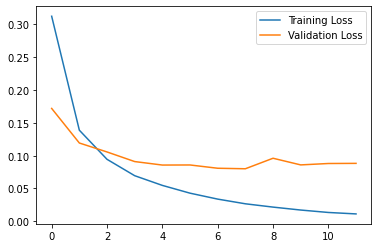

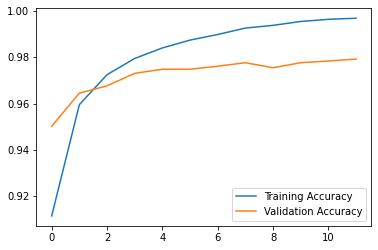

In [ ]:
# Plotting Relu activation function model

keys = history2.history.keys()
loss = history2.history['loss']
accuracy = history2.history['accuracy']
val_loss = history2.history['val_loss']
val_accuracy =  history2.history['val_accuracy']

plt.figure()
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend(loc="upper right")


plt.figure()
plt.plot(accuracy, label="Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
print(model2.evaluate(x_test, y_test, verbose=0))

In [ ]:
# Data preprocssing

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.reshape(x_train,(60000,28,28,1))
x_test = np.reshape(x_test, (10000,28,28,1))
x_train = x_train/225
x_test = x_test/225

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test,10)

In [ ]:
#Convolutional 2D model

model3 = keras.Sequential()
model3.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu", input_shape=(28, 28, 1)))
model3.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"))
model3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(128, activation="relu"))
model3.add(keras.layers.Dense(10, activation="softmax"))
model3.summary()

model3.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')
history3 = model3.fit(x_train, y_train, batch_size=128,epochs=6, verbose=1, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

[0.03965528681874275, 0.9882000088691711]


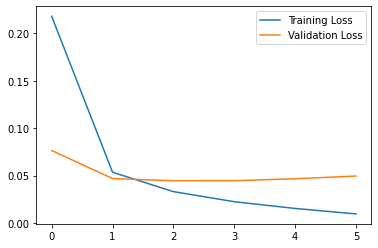

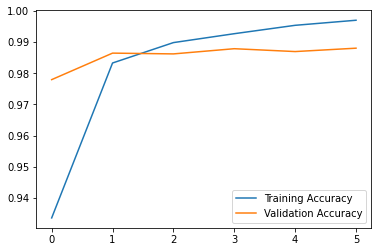

In [ ]:
# Plotting 2D convolutional model

keys = history3.history.keys()
loss = history3.history['loss']
accuracy = history3.history['accuracy']
val_loss = history3.history['val_loss']
val_accuracy =  history3.history['val_accuracy']

plt.figure()
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend(loc="upper right")


plt.figure()
plt.plot(accuracy, label="Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
print(model3.evaluate(x_test, y_test, verbose=0))

In [ ]:
#Dropout Model

model4 = keras.Sequential()
model4.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu", input_shape=(28, 28, 1)))
model4.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"))
model4.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model4.add(keras.layers.Dropout(rate=0.25))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(128, activation="relu"))
model4.add(keras.layers.Dropout(rate=0.5))
model4.add(keras.layers.Dense(10, activation="softmax"))
model4.summary()

model4.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')
history4 = model4.fit(x_train, y_train, batch_size=128,epochs=6, verbose=1, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

[0.027057193219661713, 0.9914000034332275]


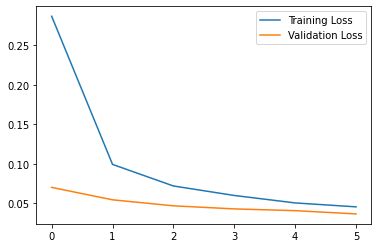

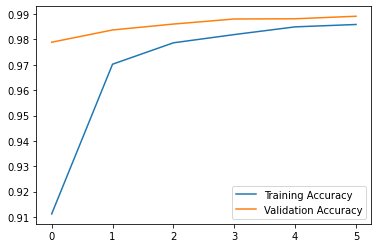

In [ ]:
# Plotting Dropout model

keys = history4.history.keys()
loss = history4.history['loss']
accuracy = history4.history['accuracy']
val_loss = history4.history['val_loss']
val_accuracy =  history4.history['val_accuracy']

plt.figure()
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend(loc="upper right")


plt.figure()
plt.plot(accuracy, label="Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
print(model4.evaluate(x_test, y_test, verbose=0))